In [28]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt


# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Luca Valderramos Cirino
## Matrícula: 211066140

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [29]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

In [30]:
#Resposta da questão 1a

sinal = [1,2,3,4,5,6,7,8,8,7,6,5,4,3,2,1]
N = len(sinal)
Xk1= np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        Xk1[k] += sinal[n]*np.exp(-2*np.pi*k*n/N)
        

print('DFT do sinal:')        
print(Xk1.real)

DFT do sinal:
[72.          8.80657653  3.36916054  2.08723452  1.59373367  1.35323646
  1.22037115  1.14142409  1.09237135  1.06101628  1.04060172  1.02714859
  1.01821161  1.01224289  1.00824225  1.00555429]


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

In [31]:
#Resposta da questão 1b

Xe, Xo = np.zeros(N, dtype=complex), np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        if n%2 == 0:
            Xe[k] += sinal[n] * np.exp(-2*np.pi*k*n/N)
        else:
            Xo[k] += np.exp(-2*np.pi*k/N) * sinal[n] * np.exp(-2*np.pi*k*n/N)
        
Xk = Xe + Xo

mae = np.zeros(N, dtype=complex)
for i in range(N):
    mae[i] = np.abs(Xk1[i] - Xk[i])

for i in range(N):
    print(f'X[{i}] = {Xk.real[i]:.17}  | Erro médio absoluto = {mae.real[i]}')


X[0] = 72.0  | Erro médio absoluto = 0.0
X[1] = 7.433505976349859  | Erro médio absoluto = 1.3730705539998835
X[2] = 2.5808453166689285  | Erro médio absoluto = 0.7883152257846691
X[3] = 1.5672169420689848  | Erro médio absoluto = 0.5200175732379217
X[4] = 1.2339834862638095  | Erro médio absoluto = 0.3597501860222654
X[5] = 1.1021100774681793  | Erro médio absoluto = 0.2511263787263407
X[6] = 1.0456522800419361  | Erro médio absoluto = 0.17471886709245865
X[7] = 1.0206310042369549  | Erro médio absoluto = 0.12079308226476249
X[8] = 1.0093686845959844  | Erro médio absoluto = 0.08300266705852422
X[9] = 1.0042637242719272  | Erro médio absoluto = 0.05675255762559139
X[10] = 1.0019423730960826  | Erro médio absoluto = 0.038659349105717666
X[11] = 1.0008852652323568  | Erro médio absoluto = 0.02626331991881181
X[12] = 1.0004035562063935  | Erro médio absoluto = 0.017808057094377716
X[13] = 1.0001839821195879  | Erro médio absoluto = 0.012058908848920913
X[14] = 1.0000838814405242  | Erro 

# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

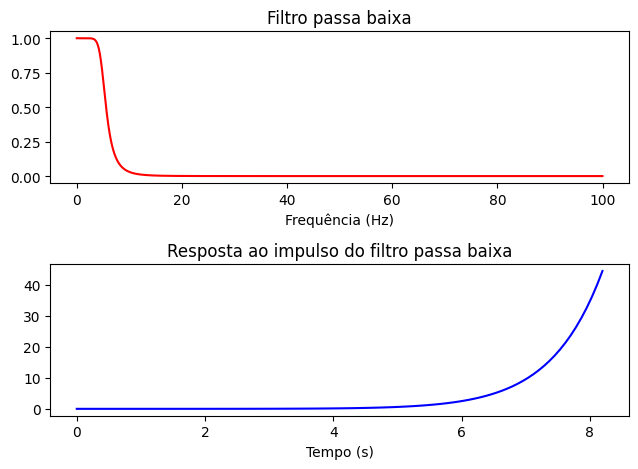

In [32]:
#Resposta da questão 2a

fs, fc = 200, 5

a, b = sp.signal.butter(5, fc, fs=fs, btype='low', analog=False)
w, h = sp.signal.freqz(a, b, fs=fs, worN=8000)

plt.subplot(211)
plt.plot(w, np.abs(h), 'r')
plt.title("Filtro passa baixa")
plt.xlabel('Frequência (Hz)')


t, impulso = sp.signal.impulse((a,b))
plt.subplot(212)
plt.plot(t, impulso, 'b')
plt.title("Resposta ao impulso do filtro passa baixa")
plt.xlabel('Tempo (s)')


plt.tight_layout()
plt.show()


## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [33]:
#Resposta da questão 2b

def filtro_passa_baixa(sinal, fs, fc):
    
    N = len(sinal)
    
    dft = np.fft.fft(sinal)
    freq = np.fft.fftfreq(N, 1/fs)
    
    dft_filtro = np.zeros(N, dtype=complex)
    dft_filtro[np.abs(freq) <= fc] = 1
    
    sinal_filtrado = np.fft.ifft(dft * dft_filtro)
    
    return sinal_filtrado.real

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [34]:
#Resposta da questão 2c

# Usarei o método overlap and add

sinal = np.loadtxt("potencia.txt")

def overlap_and_add(sinal, tamanho_janela, tamanho_sobreposicao, fc, fs):
    
    N = len(sinal)
    overlap_samples = int(tamanho_janela * tamanho_sobreposicao)
    step = tamanho_janela - overlap_samples
    
    sinal_filtrado = np.zeros(N, dtype=complex)
    
    for i in range(0, N, step):
        sinal_filtrado[i:i+tamanho_janela] += 1/2*filtro_passa_baixa(sinal[i:i+tamanho_janela], fs, fc)
        
    return sinal_filtrado.real

## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

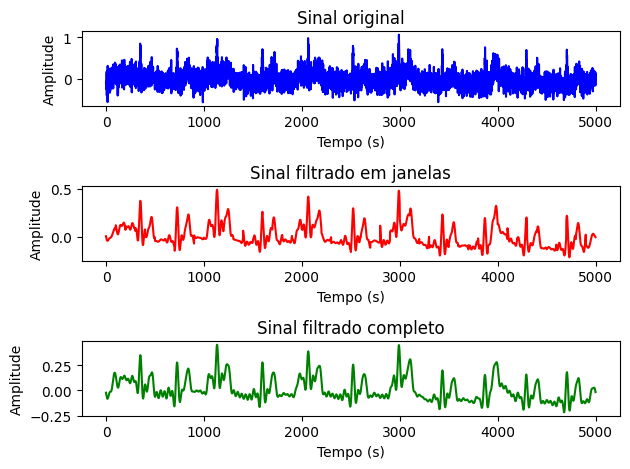

In [40]:
#Resposta da questão 2d
fs = 200
fc = 5
tamanho_janela = 200
tamanho_sobreposicao = 0.5

sinal_filtrado_janela = overlap_and_add(sinal, tamanho_janela, tamanho_sobreposicao, fc, fs)
sinal_filtrado_completo = filtro_passa_baixa(sinal, fs, fc)

t = list(range(len(sinal)))

plt.subplot(311)
plt.plot(t, sinal, 'b')
plt.title("Sinal original")
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.plot(t, sinal_filtrado_janela, 'r')
plt.title("Sinal filtrado em janelas")
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(313)
plt.plot(t, sinal_filtrado_completo, 'g')
plt.title("Sinal filtrado completo")
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

In [36]:
#Resposta da questão 3a

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

In [37]:
#Resposta da questão 3b

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

In [38]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

In [39]:
#Resposta da questão 3d